In [1]:
################
################   Clean Data + Generate Model + Evaluate
################   BNP Paribas Cardif Claims Management Kaggle Competition
################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from scipy import stats

# import other methods
from data_modifier import *

%matplotlib inline

##### upload data
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")
test = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/test.csv")
sample = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/sample_submission.csv")
trains = train[:100]
tests = test[:100]


##### split and clean data  
tr_a, te_a = train_test_split(train, train_size = 0.8)
## define variables 
y_train = tr_a.target
y_test = te_a.target
columns = train.columns
x_train = tr_a[columns[2:]]
x_test = te_a[columns[2:]]

In [2]:
##### generate pipeline 
## X.shape (91456, 108)
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train,y_train)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(91456, 19)
ObjtoCatStrtoIntTrans transform done.


In [3]:
##### generate y_predict
y_predict = call.predict_proba(x_test)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(22865, 19)
ObjtoCatStrtoIntTrans transform done.


In [4]:
## get classes from prediction
# in this case boolean, use for evaluation only second class (1)
call.classes_

array([0, 1])

In [5]:
## define prediction for each class
y_predict_0 = y_predict[:,0]
y_predict_1 = y_predict[:,1]
y_predict_0 = pd.Series(y_predict_0,index=y_test.index)
y_predict_1 = pd.Series(y_predict_1,index=y_test.index)

In [6]:
##### cross validation 3 folds
kf = KFold(91456, n_folds=3)
itr = defaultdict(list)
ite = defaultdict(list)
c = 0
for trai, tes in kf:
    print("%s %s" % (trai, tes))
    itr[c] = trai
    ite[c] = tes
    c += 1

[30486 30487 30488 ..., 91453 91454 91455] [    0     1     2 ..., 30483 30484 30485]
[    0     1     2 ..., 91453 91454 91455] [30486 30487 30488 ..., 60968 60969 60970]
[    0     1     2 ..., 60968 60969 60970] [60971 60972 60973 ..., 91453 91454 91455]


In [7]:
##### redefine my samples

#### 2.1 samples
x_train1 = x_train.iloc[itr[0],:]
x_test1 = x_train.iloc[ite[0],:]
y_train1 = tr_a.target.iloc[itr[0]]
y_test1 = tr_a.target.iloc[ite[0]]

In [8]:
#### 2.1 make prediction
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train1,y_train1)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(60970, 19)
ObjtoCatStrtoIntTrans transform done.


In [9]:
y_predict1 = call.predict_proba(x_test1)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(30486, 19)
ObjtoCatStrtoIntTrans transform done.


In [10]:
y_predict1_0 = y_predict1[:,0] 
y_predict1_1 = y_predict1[:,1]
y_predict1_0 = pd.Series(y_predict1_0,index=y_test1.index)
y_predict1_1 = pd.Series(y_predict1_1,index=y_test1.index)

In [11]:
#### 2.2 samples
x_train2 = x_train.iloc[itr[1],:]
x_test2 = x_train.iloc[ite[1],:]
y_train2 = tr_a.target.iloc[itr[1]]
y_test2 = tr_a.target.iloc[ite[1]]

In [12]:
#### 2.2 make prediction
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train2,y_train2)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(60971, 19)
ObjtoCatStrtoIntTrans transform done.


In [13]:
y_predict2 = call.predict_proba(x_test2)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(30485, 19)
ObjtoCatStrtoIntTrans transform done.


In [14]:
y_predict2_0 = y_predict2[:,0] 
y_predict2_1 = y_predict2[:,1]
y_predict2_0 = pd.Series(y_predict2_0,index=y_test2.index)
y_predict2_1 = pd.Series(y_predict2_1,index=y_test2.index)

In [15]:
#### 2.3 samples
x_train3 = x_train.iloc[itr[2],:]
x_test3 = x_train.iloc[ite[2],:]
y_train3 = tr_a.target.iloc[itr[2]]
y_test3 = tr_a.target.iloc[ite[2]]

In [16]:
#### 2.3 make prediction
call = PipelineBNP(RandomForestClassifier)
call = call.fit(x_train3,y_train3)

pipeline done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(60971, 19)
ObjtoCatStrtoIntTrans transform done.


In [17]:
y_predict3 = call.predict_proba(x_test3)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(30485, 19)
ObjtoCatStrtoIntTrans transform done.


In [18]:
y_predict3_0 = y_predict3[:,0] 
y_predict3_1 = y_predict3[:,1]
y_predict3_0 = pd.Series(y_predict3_0,index=y_test3.index)
y_predict3_1 = pd.Series(y_predict3_1,index=y_test3.index)

In [19]:
##### check parameters
#call.get_params()

In [20]:
##### Compute ROC curve and ROC area for each fold
fpr0, tpr0, thresholds = metrics.roc_curve(y_test,y_predict_1)
a0 = metrics.auc(fpr0, tpr0)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test1,y_predict1_1)
a1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2,y_predict2_1)
a2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test3,y_predict3_1)
a3 = metrics.auc(fpr3, tpr3)

In [21]:
ax = sns.set_style("whitegrid")
ax = sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 1.5})

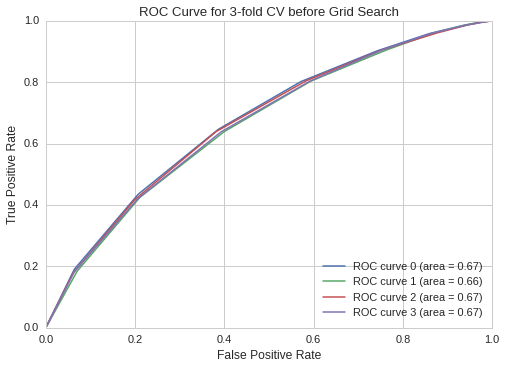

In [22]:
plt.plot(fpr0, tpr0, label='ROC curve 0 (area = %0.2f)' % a0)
plt.plot(fpr1, tpr1, label='ROC curve 1 (area = %0.2f)' % a1)
plt.plot(fpr2, tpr2, label='ROC curve 2 (area = %0.2f)' % a2)
plt.plot(fpr3, tpr3, label='ROC curve 3 (area = %0.2f)' % a3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 3-fold CV before Grid Search')
plt.legend(loc="lower right")
plt.show()
plt.savefig("ROC_Curve_woGS")